In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as skl
import seaborn as sns
import math
from sklearn.utils import shuffle
from IPython.display import display
from IPython.lib.display import Audio
import os
import warnings

In [3]:
class FCNN:
    def __init__(self, layer_sizes):
        self.tot_layers = len(layer_sizes)
        self.layer_sizes = layer_sizes
        # to access weight matrix between layers i and i+1, write self.WW[i]
        self.WW = [np.array([(np.random.randn(self.layer_sizes[j+1]) / np.sqrt(self.layer_sizes[j+1])) for i in range(self.layer_sizes[j] + 1)]) for j in range(self.tot_layers-1)]
        self.neuron_outputs = np.array([np.array([1.0 for i in range(layer_sizes[j] + 1)]) for j in range(self.tot_layers)])

    def __forward(self, x): # x includes the bias
        np.copyto(self.neuron_outputs[0], x)
        for layer_no in range(1, self.tot_layers):
            for ele_no in range(1, self.layer_sizes[layer_no]+1):
                logistic_fn = lambda x: 1 / (1 + np.exp(-x))
                if layer_no != self.tot_layers - 1: self.neuron_outputs[layer_no][ele_no] = logistic_fn(np.dot(self.WW[layer_no-1][:,ele_no-1:ele_no].T, self.neuron_outputs[layer_no-1]))
                else: 
                    self.neuron_outputs[layer_no][ele_no] = np.dot(self.WW[layer_no-1][:,ele_no-1:ele_no].T, self.neuron_outputs[layer_no-1])
                    print('neuron output for this example: ', self.neuron_outputs[layer_no][ele_no])
                    print(self.WW)
                    
    def __backward(self, y , rate_parameter): # note that this `y` is different from `y` in input of `train`
        del_list = (y - self.neuron_outputs[-1][1:])
        print(del_list, y, self.neuron_outputs[-1][1:])
        for layer_no in range(self.tot_layers-2, -1, -1):
            with warnings.catch_warnings(record=True) as w:
                dW = rate_parameter * np.outer(self.neuron_outputs[layer_no], del_list.T) 
                self.WW[layer_no] += dW
                if layer_no == self.tot_layers - 2: print('dW:\n', dW)
    #             print(layer_no)
    #             print(self.neuron_outputs[layer_no-1][1:].shape, del_list.shape, self.WW[layer_no].shape)
#                 round_arrays([self.neuron_outputs[layer_no][1:], del_list, self.WW[layer_no]])
                del_list = np.dot(self.WW[layer_no], del_list)[1:] * (self.neuron_outputs[layer_no][1:]) * (1 - self.neuron_outputs[layer_no][1:])
                if w:
                    print('warning encountered')
                    print(layer_no)
                    print(y, self.neuron_outputs[-1][1:], self.neuron_outputs[layer_no][1:], del_list, self.WW[layer_no])

    def train(self, X, y, max_epochs = 200, thresh = 1e-5):
        n = X.shape[0]  # number of rows in X
        epoch = 1
        avg_error_list = []
        prev_err = float('inf')
        X = X.copy()
        X['y'] = y
        while True:
            err = 0
            i = 0
            X = shuffle(X)
            for _, x_ in X.iterrows():
                x = np.insert(np.array(x_['x']), 0, 1)
                self.__forward(x)
                y_toBePassed = np.array(x_['y'])
                self.__backward(y_toBePassed, 1 / epoch)
                d_err = 0.5 * sum((y_toBePassed - self.neuron_outputs[-1][1:]) ** 2)
                err += d_err
                i += 1
            avg_err = err / n
            avg_error_list.append(avg_err)
            if(abs(prev_err - avg_err) < thresh or epoch > max_epochs or avg_err < 0.0015):
                break
            epoch += 1
            prev_err = avg_err
        plt.bar(x = np.arange(1, len(avg_error_list)+1), height = avg_error_list)
        plt.xlabel('epoch')
        plt.ylabel('average error')
        
    def predict(self, x_):
        x = np.insert(np.array(x_), 0, 1)
        self.__forward(x)
        return self.neuron_outputs[-1][1:]
    
def round_arrays(lst):
    for l in lst:
        np.clip(l, a_min=0.00001, a_max=5000, out=l)

In [4]:
df = pd.read_csv(r"C:\Users\PIYUS\OneDrive - students.iitmandi.ac.in\Sem6\DLA\Assignments\Assignment2\Group18\Group18\Regression\UnivariateData\18.csv",header=None, encoding="utf-8")
df = (df - np.mean(df)) / np.std(df)
df.columns = ['x', 'y']
df_train, df_test_ = skl.train_test_split(df, test_size = 0.4, train_size = 0.6)
df_test, df_validate = skl.train_test_split(df_test_, test_size = 0.5, train_size = 0.5)
y_train, y_test, y_validate = df_train.iloc[:,-1:], df_test.iloc[:,-1:], df_validate.iloc[:,-1:]
X_train, X_test, X_validate = df_train.iloc[:,:-1], df_test.iloc[:,:-1], df_validate.iloc[:,:-1]

c:\Users\PIYUS\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<ipython-input-3-b327a5f115c6>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.neuron_outputs = np.array([np.array([1.0 for i in range(layer_sizes[j] + 1)]) for j in range(self.tot_layers)])
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in ex

neuron output for this example:  0.47484773164864125
[array([[ 0.16880194,  0.36724516, -0.54025144],
       [ 0.02009058, -0.46356022, -0.37649501]]), array([[-0.26221355],
       [-0.09308494],
       [ 0.39779434],
       [ 1.91269104]])]
[0.58443013] 1.0592778588536562 [0.47484773]
dW:
 [[0.58443013]
 [0.31895683]
 [0.29618183]
 [0.1791358 ]]
neuron output for this example:  1.8410071766772826
[array([[ 0.20152714,  0.46862162, -0.28038748],
       [ 0.04409963, -0.38918475, -0.18584419]]), array([[0.32221658],
       [0.22587189],
       [0.69397617],
       [2.09182685]])]
[-3.23286018] -1.391853002141733 [1.84100718]
dW:
 [[-3.23286018]
 [-1.76348164]
 [-2.11451492]
 [-1.45532779]]
neuron output for this example:  -4.792797225120383
[array([[ 1.43396162,  1.50771079, -0.78970567],
       [-0.4890273 , -0.83867429,  0.03447684]]), array([[-2.9106436 ],
       [-1.53760975],
       [-1.42053875],
       [ 0.63649905]])]
[6.12507462] 1.3322773943977635 [-4.79279723]
dW:
 [[6.125074

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

9.121310859016741e+21
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[ 4.10361683e+21],
       [ 5.01928815e+21],
       [-4.58467030e+20],
       [ 5.47616106e+21]])]
[-9.12131086e+21] 1.2558148688822977 [9.12131086e+21]
dW:
 [[-9.12131086e+21]
 [-0.00000000e+00]
 [-9.12131086e+21]
 [-9.12131086e+21]]
neuron output for this example:  1.5941188037482906e+18
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-5.01769403e+21],
       [ 5.01928815e+21],
       [-9.57977789e+21],
       [-3.64514980e+21]])]
[-1.5941188e+18] 0.41147035101429397 [1.5941188e+18]
dW:
 [[-1.5941188e+18]
 [-1.5941188e+18]
 [-0.0000000e+00]
 [-0.0000000e+00]]
neuron output for this example:  -1.5941188037482906e+18
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-5.019288

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[-1.82725259e+25] 0.7539233472349494 [1.82725259e+25]
dW:
 [[-1.82725259e+25]
 [-0.00000000e+00]
 [-1.82725259e+25]
 [-0.00000000e+00]]
neuron output for this example:  -1.8272525892906894e+25
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-6.26622727e+24],
       [ 5.74052856e+24],
       [-1.20062986e+25],
       [ 1.30768180e+25]])]
[1.82725259e+25] 1.296594882490546 [-1.82725259e+25]
dW:
 [[1.82725259e+25]
 [0.00000000e+00]
 [1.82725259e+25]
 [0.00000000e+00]]
neuron output for this example:  1.8272525892906894e+25
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[1.20062986e+25],
       [5.74052856e+24],
       [6.26622727e+24],
       [1.30768180e+25]])]
[-1.82725259e+25] -0.6581554225853872 [1.82725259e+25]
dW:
 [[-1.82725259e+25]
 [-0.00000000e+00]
 [-1.82725259e+25]
 [-0.00000000e+00]]
neuron output for this exampl

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

dW:
 [[1.33661158e+27]
 [1.33661158e+27]
 [0.00000000e+00]
 [0.00000000e+00]]
neuron output for this example:  -1.508061039110207e+26
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[ 6.99526567e+26],
       [ 6.37085017e+26],
       [ 6.24420067e+25],
       [-9.12774678e+26]])]
[1.50806104e+26] 1.168661749521614 [-1.50806104e+26]
dW:
 [[1.50806104e+26]
 [0.00000000e+00]
 [1.50806104e+26]
 [1.50806104e+26]]
neuron output for this example:  1.4874176883737422e+27
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[ 8.50332671e+26],
       [ 6.37085017e+26],
       [ 2.13248111e+26],
       [-7.61968574e+26]])]
[-1.48741769e+27] -1.4279213666082644 [1.48741769e+27]
dW:
 [[-1.48741769e+27]
 [-1.48741769e+27]
 [-0.00000000e+00]
 [-0.00000000e+00]]
neuron output for this example:  -1.1858054805517008e+27
[array([[-2.16150044e+33,  

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-2.09647522e+29],
       [-2.40067922e+29],
       [ 3.04204008e+28],
       [ 1.31099380e+29]])]
[1.79227121e+29] 1.249230595851799 [-1.79227121e+29]
dW:
 [[1.79227121e+29]
 [0.00000000e+00]
 [1.79227121e+29]
 [0.00000000e+00]]
neuron output for this example:  -2.7048832300220528e+29
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-3.04204008e+28],
       [-2.40067922e+29],
       [ 2.09647522e+29],
       [ 1.31099380e+29]])]
[2.70488323e+29] -0.8238242278688961 [-2.70488323e+29]
dW:
 [[2.70488323e+29]
 [2.70488323e+29]
 [0.00000000e+00]
 [0.00000000e+00]]
neuron output for this example:  4.4971544410053015e+29
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[2.40067922e+29],
       [3.0420400

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[1.65948619e+30]
dW:
 [[-1.65948619e+30]
 [-0.00000000e+00]
 [-1.65948619e+30]
 [-0.00000000e+00]]
neuron output for this example:  -1.1484485170200772e+30
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-4.27027177e+29],
       [ 8.05431834e+29],
       [-1.23245901e+30],
       [ 5.11037670e+29]])]
[1.14844852e+30] 0.7041519070151601 [-1.14844852e+30]
dW:
 [[1.14844852e+30]
 [0.00000000e+00]
 [1.14844852e+30]
 [1.14844852e+30]]
neuron output for this example:  1.52685317372105e+30
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[ 7.21421340e+29],
       [ 8.05431834e+29],
       [-8.40104932e+28],
       [ 1.65948619e+30]])]
[-1.52685317e+30] 0.05181328655265906 [1.52685317e+30]
dW:
 [[-1.52685317e+30]
 [-1.52685317e+30]
 [-0.00000000e+00]
 [-0.00000000e+00]]
neuron output for this example:  -8.894423269290446e+29
[array(

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

dW:
 [[-5.213841e+25]
 [-5.213841e+25]
 [-0.000000e+00]
 [-0.000000e+00]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[ 1.52553281e+26],
       [-1.52553281e+26],
       [ 3.05107020e+26],
       [-4.05521891e+26]])]
[-1.24567789] -1.2456778929465835 [0.]
dW:
 [[-0.62283895]
 [-0.62283895]
 [-0.        ]
 [-0.        ]]
neuron output for this example:  4.576603009947087e+26
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[ 1.52553281e+26],
       [-1.52553281e+26],
       [ 3.05107020e+26],
       [-4.05521891e+26]])]
[-4.57660301e+26] -1.194497559895537 [4.57660301e+26]
dW:
 [[-2.2883015e+26]
 [-0.0000000e+00]
 [-2.2883015e+26]
 [-0.0000000e+00]]
neuron output for this example:  -4.055218910364643e+26
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+3

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  3.3476441039957986e+21
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[ 9.63479932e+20],
       [-9.63479932e+20],
       [ 2.38416417e+21],
       [-1.41734035e+23]])]
[-3.3476441e+21] 0.5830154429809361 [3.3476441e+21]
dW:
 [[-1.67382205e+21]
 [-0.00000000e+00]
 [-1.67382205e+21]
 [-0.00000000e+00]]
neuron output for this example:  -1.6738220519978993e+21
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-7.10342120e+20],
       [-9.63479932e+20],
       [ 7.10342120e+20],
       [-1.41734035e+23]])]
[1.67382205e+21] -0.8929874141430242 [-1.67382205e+21]
dW:
 [[8.36911026e+20]
 [8.36911026e+20]
 [0.00000000e+00]
 [0.00000000e+00]]
neuron output for this example:  8.369110259989496e+20
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.4

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.46983272e+20],
       [ 1.46983272e+20],
       [ 1.63237765e+20],
       [-2.66339769e+22]])]
[-1.62544931e+19] 0.4026205216722264 [1.62544931e+19]
dW:
 [[-8.12724657e+18]
 [-0.00000000e+00]
 [-8.12724657e+18]
 [-0.00000000e+00]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.55110518e+20],
       [ 1.46983272e+20],
       [ 1.55110518e+20],
       [-2.66339769e+22]])]
[1.3319234] 1.3319234012240806 [0.]
dW:
 [[0.6659617]
 [0.       ]
 [0.6659617]
 [0.       ]]
neuron output for this example:  -2.663397689601113e+22
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.55110518e+20],
       [ 1.46983272e+20],
       [ 1.55110518e+20],
       [-2.6633976

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e


[8.25822624e+18] 0.5689265146683641 [-8.25822624e+18]
dW:
 [[4.12911312e+18]
 [0.00000000e+00]
 [4.12911312e+18]
 [4.12911312e+18]]
neuron output for this example:  3.3518782435018015e+18
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.48531401e+20],
       [ 1.51883279e+20],
       [ 1.56789627e+20],
       [-4.12911312e+18]])]
[-3.35187824e+18] 0.3656636343397513 [3.35187824e+18]
dW:
 [[-1.67593912e+18]
 [-1.67593912e+18]
 [-0.00000000e+00]
 [-0.00000000e+00]]
neuron output for this example:  6.58228711435459e+18
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.50207340e+20],
       [ 1.50207340e+20],
       [ 1.56789627e+20],
       [-4.12911312e+18]])]
[-6.58228711e+18] -0.9453430045306974 [6.58228711e+18]
dW:
 [[-3.29114356e+18]
 [-0.00000000e+00]
 [-3.29114356e+18]
 [-0.00000000e+00]]
neuron output for this exa

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

 0.10760261072505455 [32768.]
dW:
 [[-16383.94619869]
 [    -0.        ]
 [-16383.94619869]
 [    -0.        ]]
neuron output for this example:  -14067564544.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [-2.57881929e+14]])]
[1.40675645e+10] -1.3227280471303624 [-1.40675645e+10]
dW:
 [[7.03378227e+09]
 [7.03378227e+09]
 [0.00000000e+00]
 [0.00000000e+00]]
neuron output for this example:  7033815040.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [-2.57881929e+14]])]
[-7.03381504e+09] 1.2602043842359634 [7.03381504e+09]
dW:
 [[-3.51690752e+09]
 [-0.00000000e+00]
 [-3.51690752e+09]
 [-0.00000000e+00]]
neuron output for this example:  -3516891136.0
[array([[-2.16150044

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

 1.168661749521614 [-1.39342766e+11]
dW:
 [[6.96713829e+10]
 [0.00000000e+00]
 [6.96713829e+10]
 [6.96713829e+10]]
neuron output for this example:  69671391342.08914
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [-6.96714157e+10]])]
[-6.96713913e+10] 1.0460385141579227 [6.96713913e+10]
dW:
 [[-3.48356957e+10]
 [-0.00000000e+00]
 [-3.48356957e+10]
 [-3.48356957e+10]]
neuron output for this example:  69671419904.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [-1.04507111e+11]])]
[-6.96714199e+10] 0.7592332448401898 [6.96714199e+10]
dW:
 [[-3.483571e+10]
 [-0.000000e+00]
 [-3.483571e+10]
 [-0.000000e+00]]
neuron output for this example:  -104507078600.4324
[array([[-2.1

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  57704448.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [-1.18239295e+08]])]
[-57704449.38985153] -1.3898515247377308 [57704448.]
dW:
 [[-19234816.46328384]
 [-19234816.46328384]
 [       -0.        ]
 [       -0.        ]]
neuron output for this example:  -19247167.029664308
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [-1.18239295e+08]])]
[19247167.66896467] 0.6393003575964872 [-19247167.02966431]
dW:
 [[6415722.55632155]
 [      0.        ]
 [6415722.55632155]
 [6415722.55632155]]
neuron output for this example:  111837184.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.4

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

 1.4786889710329332 [458752.]
dW:
 [[-152916.84043701]
 [     -0.        ]
 [-152916.84043701]
 [     -0.        ]]
neuron output for this example:  131072.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [-1.36406092e+06]])]
[-131070.63635881] 1.3636411895860514 [131072.]
dW:
 [[-43690.2121196]
 [    -0.       ]
 [-43690.2121196]
 [    -0.       ]]
neuron output for this example:  -196608.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [-1.36406092e+06]])]
[196607.10701259] -0.8929874141430242 [-196608.]
dW:
 [[65535.70233753]
 [65535.70233753]
 [    0.        ]
 [    0.        ]]
neuron output for this example:  -65536.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[-1832.22564961]
dW:
 [[611.13143712]
 [  0.        ]
 [611.13143712]
 [611.13143712]]
neuron output for this example:  -1221.0942124891094
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [-1.22109421e+03]])]
[1222.11334752] 1.0191350329580369 [-1221.09421249]
dW:
 [[407.37111584]
 [  0.        ]
 [407.37111584]
 [407.37111584]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [-8.13723097e+02]])]
[-0.84007251] -0.8400725145409326 [0.]
dW:
 [[-0.28002417]
 [-0.        ]
 [-0.28002417]
 [-0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.2771621

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [-9.11911142e-01]])]
[32766.85847398] -1.141526021385656 [-32768.]
dW:
 [[10922.28615799]
 [10922.28615799]
 [    0.        ]
 [    0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [-9.11911142e-01]])]
[0.69289492] 0.6928949240920497 [0.]
dW:
 [[0.23096497]
 [0.        ]
 [0.23096497]
 [0.        ]]
neuron output for this example:  -0.9119111416259384
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.5

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 8.11453706e-01]])]
[32768.45444512] 0.45444512229937534 [-32768.]
dW:
 [[10922.81814837]
 [10922.81814837]
 [    0.        ]
 [    0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 8.11453706e-01]])]
[1.19761839] 1.19761839112886 [0.]
dW:
 [[0.39920613]
 [0.        ]
 [0.39920613]
 [0.        ]]
neuron output for this example:  0.8114537061351179
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.524

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[1.00886928]
dW:
 [[0.09658702]
 [0.        ]
 [0.09658702]
 [0.09658702]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.10545631e+00]])]
[-0.2341424] -0.23414239914823526 [0.]
dW:
 [[-0.0585356]
 [-0.       ]
 [-0.0585356]
 [-0.       ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.10545631e+00]])]
[-0.77549] -0.7754899999342587 [0.]
dW:
 [[-0.1938725]
 [-0.       ]
 [-0.1938725]
 [-0.       ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[[-0.0638101]
 [-0.       ]
 [-0.0638101]
 [-0.       ]]
neuron output for this example:  1.1004371580798766
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.10043716e+00]])]
[-0.11613505] 0.9843021046676578 [1.10043716]
dW:
 [[-0.02903376]
 [-0.        ]
 [-0.02903376]
 [-0.02903376]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.07140339e+00]])]
[32766.7080552] -1.2919448007469139 [-32768.]
dW:
 [[8191.6770138]
 [8191.6770138]
 [   0.       ]
 [   0.       ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), arr

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e


[32767.98526257] -0.014737430099690613 [-32768.]
dW:
 [[8191.99631564]
 [8191.99631564]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.23411030e-01]])]
[32766.7223636] -1.2776363966666586 [-32768.]
dW:
 [[8191.6805909]
 [8191.6805909]
 [   0.       ]
 [   0.       ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.23411030e-01]])]
[-0.76313564] -0.7631356381727321 [0.]
dW:
 [[-0.19078391]
 [-0.        ]
 [-0.19078391]
 [-0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.6503

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

 -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.67177649e-01]])]
[32768.4039657] 0.4039656957322207 [-32768.]
dW:
 [[8192.10099142]
 [8192.10099142]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.67177649e-01]])]
[1.23103535] 1.2310353467245077 [0.]
dW:
 [[0.30775884]
 [0.        ]
 [0.30775884]
 [0.        ]]
neuron output for this example:  0.9671776493285329
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.67177649e-01]

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

1.193441271679404 [0.82051268]
dW:
 [[0.09323215]
 [0.        ]
 [0.09323215]
 [0.09323215]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.13744824e-01]])]
[32766.59539758] -1.4046024202850895 [-32768.]
dW:
 [[8191.64884939]
 [8191.64884939]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.13744824e-01]])]
[1.3319234] 1.3319234012240806 [0.]
dW:
 [[0.33298085]
 [0.        ]
 [0.33298085]
 [0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.427

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.19602591e+00]])]
[1.38296922] 1.3829692168691277 [0.]
dW:
 [[0.27659384]
 [0.        ]
 [0.27659384]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.19602591e+00]])]
[0.13762123] 0.13762123185334832 [0.]
dW:
 [[0.02752425]
 [0.        ]
 [0.02752425]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.19602591e+00]])]
[1.30735627] 1.3073562749705003 [0.]
dW:

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.15779807e+00]])]
[32767.60146317] -0.39853682900648646 [-32768.]
dW:
 [[6553.52029263]
 [6553.52029263]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.15779807e+00]])]
[-0.45878647] -0.45878646716728394 [0.]
dW:
 [[-0.09175729]
 [-0.        ]
 [-0.09175729]
 [-0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.15779807e+00]])]
[-0.1493964

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

-0.9673613799337619 [0.]
dW:
 [[-0.19347228]
 [-0.        ]
 [-0.19347228]
 [-0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.58850041e-01]])]
[0.4138775] 0.41387750459533645 [0.]
dW:
 [[0.0827755]
 [0.       ]
 [0.0827755]
 [0.       ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.58850041e-01]])]
[1.47868897] 1.4786889710329332 [0.]
dW:
 [[0.29573779]
 [0.        ]
 [0.29573779]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

 0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.01836680e+00]])]
[0.5490321] 0.5490320983073957 [0.]
dW:
 [[0.10980642]
 [0.        ]
 [0.10980642]
 [0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.01836680e+00]])]
[32766.68418898] -1.3158110205166023 [-32768.]
dW:
 [[6553.3368378]
 [6553.3368378]
 [   0.       ]
 [   0.       ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.01836680e+00]])]
[1.43890014] 1

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  0.9805725682362508
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.80572568e-01]])]
[-0.24123374] 0.7393388284792216 [0.98057257]
dW:
 [[-0.04824675]
 [-0.        ]
 [-0.04824675]
 [-0.04824675]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.32325820e-01]])]
[32768.53827071] 0.5382707058274413 [-32768.]
dW:
 [[6553.70765414]
 [6553.70765414]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
    

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

-1.4023566875912463 [-32768.]
dW:
 [[6553.31952866]
 [6553.31952866]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.15846795e-01]])]
[32768.1757109] 0.17571089734160827 [-32768.]
dW:
 [[6553.63514218]
 [6553.63514218]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.15846795e-01]])]
[1.38488078] 1.3848807800070144 [0.]
dW:
 [[0.27697616]
 [0.        ]
 [0.27697616]
 [0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.08204911e+00]])]
[32766.6238473] -1.3761526969025573 [-32768.]
dW:
 [[5461.10397455]
 [5461.10397455]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.08204911e+00]])]
[0.33840616] 0.3384061599661825 [0.]
dW:
 [[0.05640103]
 [0.        ]
 [0.05640103]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
      

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.49131163e-01]])]
[0.71441771] 0.7144177090519587 [0.]
dW:
 [[0.11906962]
 [0.        ]
 [0.11906962]
 [0.        ]]
neuron output for this example:  0.9491311634757426
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.49131163e-01]])]
[0.3587915] 1.3079226640483927 [0.94913116]
dW:
 [[0.05979858]
 [0.        ]
 [0.05979858]
 [0.05979858]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
     

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e


dW:
 [[5461.34803396]
 [5461.34803396]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  1.0835169815401962
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.08351698e+00]])]
[-0.44421662] 0.6393003575964872 [1.08351698]
dW:
 [[-0.0740361]
 [-0.       ]
 [-0.0740361]
 [-0.0740361]]
neuron output for this example:  1.009480877549578
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.00948088e+00]])]
[0.18962428] 1.1991051624583273 [1.00948088]
dW:
 [[0.03160405]
 [0.        ]
 [0.03160405]
 [0.03160405]]
neuron output for this example:  1.0410849250343697
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.93183873e-01]])]
[32768.46025061] 0.46025061034777176 [-32768.]
dW:
 [[5461.41004177]
 [5461.41004177]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.93183873e-01]])]
[1.35011865] 1.350118650351372 [0.]
dW:
 [[0.22501978]
 [0.        ]
 [0.22501978]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.93183873e-01]])]
[-1.41373431] -1.413

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e


dW:
 [[5461.32741976]
 [5461.32741976]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.09713115e+00]])]
[1.47868897] 1.4786889710329332 [0.]
dW:
 [[0.24644816]
 [0.        ]
 [0.24644816]
 [0.        ]]
neuron output for this example:  1.0971311538175752
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.09713115e+00]])]
[-0.28324136] 0.8138897908568005 [1.09713115]
dW:
 [[-0.04720689]
 [-0.        ]
 [-0.04720689]
 [-0.04720689]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), ar

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

 0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.00580381e+00]])]
[-0.89159268] -0.8915926810387143 [0.]
dW:
 [[-0.12737038]
 [-0.        ]
 [-0.12737038]
 [-0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.00580381e+00]])]
[1.45334306] 1.453343059797251 [0.]
dW:
 [[0.20762044]
 [0.        ]
 [0.20762044]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.00580381e+00]])]
[0.8550946] 0.8550945962734683 

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e


[32766.60471822] -1.3952817800220236 [-32768.]
dW:
 [[4680.94353117]
 [4680.94353117]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.06665983e+00]])]
[0.69190374] 0.6919037432057381 [0.]
dW:
 [[0.09884339]
 [0.        ]
 [0.09884339]
 [0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.06665983e+00]])]
[32766.84733735] -1.152662646629714 [-32768.]
dW:
 [[4680.97819105]
 [4680.97819105]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e


[1.28866544] 1.2886654354000535 [0.]
dW:
 [[0.18409506]
 [0.        ]
 [0.18409506]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.04780342e+00]])]
[0.93339789] 0.933397886292084 [0.]
dW:
 [[0.13334256]
 [0.        ]
 [0.13334256]
 [0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.04780342e+00]])]
[32766.59512147] -1.404878534960562 [-32768.]
dW:
 [[4680.94216021]
 [4680.94216021]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38, 

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

 -0.5682411564699784 [0.]
dW:
 [[-0.08117731]
 [-0.        ]
 [-0.08117731]
 [-0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.04877110e+00]])]
[32767.98526257] -0.014737430099690613 [-32768.]
dW:
 [[4681.1407518]
 [4681.1407518]
 [   0.       ]
 [   0.       ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.04877110e+00]])]
[32766.84175842] -1.1582415790469538 [-32768.]
dW:
 [[4680.97739406]
 [4680.97739406]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.63942046e-01]])]
[-1.35856065] -1.3585606521432214 [0.]
dW:
 [[-0.19408009]
 [-0.        ]
 [-0.19408009]
 [-0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.63942046e-01]])]
[-0.45829088] -0.4582908767241282 [0.]
dW:
 [[-0.06547013]
 [-0.        ]
 [-0.06547013]
 [-0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.6394

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

 -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.11365195e+00]])]
[32766.71566605] -1.2843339475127356 [-32768.]
dW:
 [[4095.83945826]
 [4095.83945826]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  1.1136519464331018
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.11365195e+00]])]
[-0.54472543] 0.5689265146683641 [1.11365195]
dW:
 [[-0.06809068]
 [-0.        ]
 [-0.06809068]
 [-0.06809068]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.10478534e+00]])]
[-0.3585356] -0.3585356003803401 [0.]
dW:
 [[-0.04481695]
 [-0.        ]
 [-0.04481695]
 [-0.        ]]
neuron output for this example:  1.1047853400157586
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.10478534e+00]])]
[-0.33811824] 0.7666671014875268 [1.10478534]
dW:
 [[-0.04226478]
 [-0.        ]
 [-0.04226478]
 [-0.04226478]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.06252056e+00]])]
[32

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.96224397e-01]])]
[1.44923674] 1.449236738982531 [0.]
dW:
 [[0.18115459]
 [0.        ]
 [0.18115459]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.96224397e-01]])]
[-0.33814559] -0.33814559357621593 [0.]
dW:
 [[-0.0422682]
 [-0.       ]
 [-0.0422682]
 [-0.       ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.96224397e-01]])]
[1

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[[-0.15752041]
 [-0.        ]
 [-0.15752041]
 [-0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.76260846e-01]])]
[-1.04802934] -1.0480293443525783 [0.]
dW:
 [[-0.13100367]
 [-0.        ]
 [-0.13100367]
 [-0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.76260846e-01]])]
[32766.51079604] -1.489203956849868 [-32768.]
dW:
 [[4095.81384951]
 [4095.81384951]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.9762608459292744
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), ar

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[0.]
dW:
 [[-0.08910238]
 [-0.        ]
 [-0.08910238]
 [-0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.17067630e+00]])]
[0.07567243] 0.07567242645887386 [0.]
dW:
 [[0.00945905]
 [0.        ]
 [0.00945905]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.17067630e+00]])]
[1.11053607] 1.1105360704029128 [0.]
dW:
 [[0.13881701]
 [0.        ]
 [0.13881701]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.5

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.08383704e+00]])]
[1.44215688] 1.442156875508877 [0.]
dW:
 [[0.18026961]
 [0.        ]
 [0.18026961]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.08383704e+00]])]
[1.37815491] 1.3781549097070427 [0.]
dW:
 [[0.17226936]
 [0.        ]
 [0.17226936]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.08383704e+00]])]
[1.39663335] 1.3966333533732804 [0.]
dW:
 

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e


neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02178966e+00]])]
[32766.57534939] -1.4246506112807056 [-32768.]
dW:
 [[3640.73059438]
 [3640.73059438]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02178966e+00]])]
[1.29277176] 1.2927717562147727 [0.]
dW:
 [[0.14364131]
 [0.        ]
 [0.14364131]
 [0.        ]]
neuron output for this example:  1.0217896563289992
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.5240

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02995201e+00]])]
[-0.31782639] -0.31782638540682817 [0.]
dW:
 [[-0.03531404]
 [-0.        ]
 [-0.03531404]
 [-0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02995201e+00]])]
[-0.84371864] -0.8437186442298645 [0.]
dW:
 [[-0.09374652]
 [-0.        ]
 [-0.09374652]
 [-0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.029

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.75394247e-01]])]
[-0.96713482] -0.967134824302605 [0.]
dW:
 [[-0.10745942]
 [-0.        ]
 [-0.10745942]
 [-0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.75394247e-01]])]
[0.12445269] 0.12445268579235164 [0.]
dW:
 [[0.01382808]
 [0.        ]
 [0.01382808]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.75394247e-01]])

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

dW:
 [[0.0886465]
 [0.       ]
 [0.0886465]
 [0.       ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.10058353e+00]])]
[32767.33865864] -0.6613413611485315 [-32768.]
dW:
 [[3640.81540652]
 [3640.81540652]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  1.1005835309598793
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.10058353e+00]])]
[0.18503756] 1.285621094106382 [1.10058353]
dW:
 [[0.02055973]
 [0.        ]
 [0.02055973]
 [0.02055973]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]])

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[-32768.]
dW:
 [[3640.71972924]
 [3640.71972924]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.05371253e+00]])]
[-1.21334416] -1.2133441564624046 [0.]
dW:
 [[-0.13481602]
 [-0.        ]
 [-0.13481602]
 [-0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.05371253e+00]])]
[32766.7411748] -1.2588251994171593 [-32768.]
dW:
 [[3640.74901942]
 [3640.74901942]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.427754

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

-32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.03388069e+00]])]
[32766.71124822] -1.2887517823202959 [-32768.]
dW:
 [[3640.74569425]
 [3640.74569425]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.03388069e+00]])]
[-1.41373431] -1.4137343113879475 [0.]
dW:
 [[-0.15708159]
 [-0.        ]
 [-0.15708159]
 [-0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.03388069e+00]])]

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[0.97581922]
dW:
 [[-0.03479174]
 [-0.        ]
 [-0.03479174]
 [-0.03479174]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.41027480e-01]])]
[32767.05006924] -0.9499307560616254 [-32768.]
dW:
 [[3276.70500692]
 [3276.70500692]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.41027480e-01]])]
[-0.77549] -0.7754899999342587 [0.]
dW:
 [[-0.077549]
 [-0.      ]
 [-0.077549]
 [-0.      ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

 [[3276.74083245]
 [3276.74083245]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02453617e+00]])]
[-0.2341424] -0.23414239914823526 [0.]
dW:
 [[-0.02341424]
 [-0.        ]
 [-0.02341424]
 [-0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02453617e+00]])]
[0.5177391] 0.5177391017538441 [0.]
dW:
 [[0.05177391]
 [0.        ]
 [0.05177391]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

 [[-0.13220767]
 [-0.        ]
 [-0.13220767]
 [-0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.06880680e+00]])]
[1.29659488] 1.296594882490546 [0.]
dW:
 [[0.12965949]
 [0.        ]
 [0.12965949]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.06880680e+00]])]
[-1.18216444] -1.1821644377244314 [0.]
dW:
 [[-0.11821644]
 [-0.        ]
 [-0.11821644]
 [-0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.524014

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02975958e+00]])]
[0.27532458] 0.2753245764159232 [0.]
dW:
 [[0.02753246]
 [0.        ]
 [0.02753246]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02975958e+00]])]
[-0.68052779] -0.6805277911621345 [0.]
dW:
 [[-0.06805278]
 [-0.        ]
 [-0.06805278]
 [-0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02975958e+

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[1.14175122]
dW:
 [[0.013679]
 [0.      ]
 [0.013679]
 [0.013679]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.15543022e+00]])]
[1.24661105] 1.2466110463665472 [0.]
dW:
 [[0.1246611]
 [0.       ]
 [0.1246611]
 [0.       ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.15543022e+00]])]
[32766.95474596] -1.0452540378709059 [-32768.]
dW:
 [[3276.6954746]
 [3276.6954746]
 [   0.       ]
 [   0.       ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.01867559e+00]])]
[-1.32259353] -1.3225935297243632 [0.]
dW:
 [[-0.13225935]
 [-0.        ]
 [-0.13225935]
 [-0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.01867559e+00]])]
[0.01429001] 0.01429001014229168 [0.]
dW:
 [[0.001429]
 [0.      ]
 [0.001429]
 [0.      ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.01867559e+00]])]


<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.96439477e-01]])]
[32767.42439579] -0.5756042144825788 [-32768.]
dW:
 [[2978.85676325]
 [2978.85676325]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.96439477e-01]])]
[32766.6089272] -1.3910728011869362 [-32768.]
dW:
 [[2978.78262975]
 [2978.78262975]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],


<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.01120813e+00]])]
[1.29277176] 1.2927717562147727 [0.]
dW:
 [[0.11752471]
 [0.        ]
 [0.11752471]
 [0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.01120813e+00]])]
[32766.74753252] -1.2524674820178179 [-32768.]
dW:
 [[2978.79523023]
 [2978.79523023]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.01120813e+00]])]
[32767.04

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[0.]
dW:
 [[0.11867036]
 [0.        ]
 [0.11867036]
 [0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.82949351e-01]])]
[32766.65639344] -1.3436065645141688 [-32768.]
dW:
 [[2978.78694486]
 [2978.78694486]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.82949351e-01]])]
[0.3983018] 0.3983018049532973 [0.]
dW:
 [[0.03620925]
 [0.        ]
 [0.03620925]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.524014

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e


neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.10882605e+00]])]
[-1.07075571] -1.0707557061030084 [0.]
dW:
 [[-0.09734143]
 [-0.        ]
 [-0.09734143]
 [-0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.10882605e+00]])]
[32766.71290491] -1.2870950942674608 [-32768.]
dW:
 [[2978.79208226]
 [2978.79208226]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20]

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e


dW:
 [[-0.01081956]
 [-0.        ]
 [-0.01081956]
 [-0.01081956]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.05971792e+00]])]
[32767.87318833] -0.12681166888763717 [-32768.]
dW:
 [[2978.89756258]
 [2978.89756258]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.05971792e+00]])]
[32766.85153571] -1.1484642875898372 [-32768.]
dW:
 [[2978.80468506]
 [2978.80468506]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  1.0597179216557255
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.2771621

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e


[32768.4039657] 0.4039656957322207 [-32768.]
dW:
 [[2978.94581506]
 [2978.94581506]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.09972790e+00]])]
[32766.82011528] -1.1798847216859147 [-32768.]
dW:
 [[2978.80182866]
 [2978.80182866]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.09972790e+00]])]
[1.40534159] 1.4053415854458748 [0.]
dW:
 [[0.12775833]
 [0.        ]
 [0.12775833]
 [0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.03966870e+00]])]
[32768.03078609] 0.030786092035905953 [-32768.]
dW:
 [[2730.66923217]
 [2730.66923217]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  1.0396686960356767
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.03966870e+00]])]
[-0.14230731] 0.8973613812111839 [1.0396687]
dW:
 [[-0.01185894]
 [-0.        ]
 [-0.01185894]
 [-0.01185894]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02780975

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.04405265e+00]])]
[-1.31259676] -1.3125967624995631 [0.]
dW:
 [[-0.10938306]
 [-0.        ]
 [-0.10938306]
 [-0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.04405265e+00]])]
[0.5748736] 0.5748735999862339 [0.]
dW:
 [[0.04790613]
 [0.        ]
 [0.04790613]
 [0.        ]]
neuron output for this example:  1.0440526464254303
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.04405265e+00]])]
[-0.38429148] 0.65976

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[32768.21217219] 0.21217219423092748 [-32768.]
dW:
 [[2730.68434768]
 [2730.68434768]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.08975100e+00]])]
[-0.14932563] -0.1493256347338575 [0.]
dW:
 [[-0.0124438]
 [-0.       ]
 [-0.0124438]
 [-0.       ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.08975100e+00]])]
[32766.7411748] -1.2588251994171593 [-32768.]
dW:
 [[2730.56176457]
 [2730.56176457]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.6503282

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.75486925e-01]])]
[32766.62556275] -1.3744372459828909 [-32768.]
dW:
 [[2730.55213023]
 [2730.55213023]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.9754869253055153
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.75486925e-01]])]
[-0.06283304] 0.912653886314277 [0.97548693]
dW:
 [[-0.00523609]
 [-0.        ]
 [-0.00523609]
 [-0.00523609]]
neuron output for this example:  0.9702508387229121
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.5240

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[1.04742106]
dW:
 [[0.01804464]
 [0.        ]
 [0.01804464]
 [0.01804464]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.06546570e+00]])]
[1.14614778] 1.1461477836753935 [0.]
dW:
 [[0.09551232]
 [0.        ]
 [0.09551232]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.06546570e+00]])]
[-0.9226662] -0.9226662018245828 [0.]
dW:
 [[-0.07688885]
 [-0.        ]
 [-0.07688885]
 [-0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[0.]
dW:
 [[-0.05081251]
 [-0.        ]
 [-0.05081251]
 [-0.        ]]
neuron output for this example:  1.0263279324325443
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02632793e+00]])]
[0.30644505] 1.3327729848409193 [1.02632793]
dW:
 [[0.0235727]
 [0.       ]
 [0.0235727]
 [0.0235727]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.04990063e+00]])]
[-0.8482356] -0.848235597126056 [0.]
dW:
 [[-0.06524889]
 [-0.        ]
 [-0.06524889]
 [-0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  1.0287635880663515
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02876359e+00]])]
[0.22414854] 1.2529121248580997 [1.02876359]
dW:
 [[0.0172422]
 [0.       ]
 [0.0172422]
 [0.0172422]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.04600578e+00]])]
[-1.18562649] -1.1856264909630483 [0.]
dW:
 [[-0.09120204]
 [-0.        ]
 [-0.09120204]
 [-0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
  

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.64436315e-01]])]
[32766.9124367] -1.0875633019894635 [-32768.]
dW:
 [[2520.5317259]
 [2520.5317259]
 [   0.       ]
 [   0.       ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.64436315e-01]])]
[-0.88000294] -0.8800029445323425 [0.]
dW:
 [[-0.06769253]
 [-0.        ]
 [-0.06769253]
 [-0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.86627133e-01]])]
[32767.36690729] -0.6330927058886511 [-32768.]
dW:
 [[2520.56668518]
 [2520.56668518]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.86627133e-01]])]
[1.35011865] 1.350118650351372 [0.]
dW:
 [[0.10385528]
 [0.        ]
 [0.10385528]
 [0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
 

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e


[0.09181452] 0.09181451517880562 [0.]
dW:
 [[0.00706266]
 [0.        ]
 [0.00706266]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.06289829e+00]])]
[0.27546617] 0.2754661736853963 [0.]
dW:
 [[0.02118971]
 [0.        ]
 [0.02118971]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.06289829e+00]])]
[-1.35856065] -1.3585606521432214 [0.]
dW:
 [[-0.10450467]
 [-0.        ]
 [-0.10450467]
 [-0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), arr

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.00998000e+00]])]
[32768.03078609] 0.030786092035905953 [-32768.]
dW:
 [[2520.61775278]
 [2520.61775278]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.00998000e+00]])]
[-0.02535723] -0.02535722531017189 [0.]
dW:
 [[-0.00195056]
 [-0.        ]
 [-0.00195056]
 [-0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.04540350e+00]])]
[0.35760173] 1.403005230499569 [1.0454035]
dW:
 [[0.02554298]
 [0.        ]
 [0.02554298]
 [0.02554298]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.07094648e+00]])]
[32766.52737921] -1.472620792635528 [-32768.]
dW:
 [[2340.46624137]
 [2340.46624137]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.07094648e+00]])]
[327

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

1.4315370802983958 [0.]
dW:
 [[0.10225265]
 [0.        ]
 [0.10225265]
 [0.        ]]
neuron output for this example:  1.0306092657473875
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.03060927e+00]])]
[-0.31739513] 0.7132141322614374 [1.03060927]
dW:
 [[-0.02267108]
 [-0.        ]
 [-0.02267108]
 [-0.02267108]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.00793818e+00]])]
[1.13680236] 1.13680236389017 [0.]
dW:
 [[0.08120017]
 [0.        ]
 [0.08120017]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]])

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e


[32766.6238473] -1.3761526969025573 [-32768.]
dW:
 [[2340.47313195]
 [2340.47313195]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  1.011601819513208
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.01160182e+00]])]
[0.29632084] 1.3079226640483927 [1.01160182]
dW:
 [[0.02116577]
 [0.        ]
 [0.02116577]
 [0.02116577]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.03276759e+00]])]
[-0.45829088] -0.4582908767241282 [0.]
dW:
 [[-0.03273506]
 [-0.        ]
 [-0.03273506]
 [-0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.6503282

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[[0.09816656]
 [0.        ]
 [0.09816656]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.04044252e+00]])]
[-0.50346041] -0.5034604056860421 [0.]
dW:
 [[-0.03596146]
 [-0.        ]
 [-0.03596146]
 [-0.        ]]
neuron output for this example:  1.0404425200187462
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.04044252e+00]])]
[-0.02130749] 1.0191350329580369 [1.04044252]
dW:
 [[-0.00152196]
 [-0.        ]
 [-0.00152196]
 [-0.00152196]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e


dW:
 [[2340.60028832]
 [2340.60028832]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  1.0366008576495078
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.03660086e+00]])]
[0.20045237] 1.237053230677114 [1.03660086]
dW:
 [[0.01431803]
 [0.        ]
 [0.01431803]
 [0.01431803]]
neuron output for this example:  1.0509188842943369
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.05091888e+00]])]
[-0.23313517] 0.8177837157673103 [1.05091888]
dW:
 [[-0.01665251]
 [-0.        ]
 [-0.01665251]
 [-0.01665251]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.12305124e+00]])]
[1.40937711] 1.4093771076258579 [0.]
dW:
 [[0.10066979]
 [0.        ]
 [0.10066979]
 [0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.12305124e+00]])]
[32766.7223636] -1.2776363966666586 [-32768.]
dW:
 [[2340.48016883]
 [2340.48016883]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
 

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  1.0817108934342394
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.08171089e+00]])]
[-0.26392718] 0.8177837157673103 [1.08171089]
dW:
 [[-0.01759515]
 [-0.        ]
 [-0.01759515]
 [-0.01759515]]
neuron output for this example:  1.064115748256444
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.06411575e+00]])]
[0.17626502] 1.2403807665097315 [1.06411575]
dW:
 [[0.011751]
 [0.      ]
 [0.011751]
 [0.011751]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.03983283e+00]])]
[32766.74599619] -1.2540038123916009 [-32768.]
dW:
 [[2184.44973308]
 [2184.44973308]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  1.0398328323075616
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.03983283e+00]])]
[-0.07110643] 0.9687264050256186 [1.03983283]
dW:
 [[-0.00474043]
 [-0.        ]
 [-0.00474043]
 [-0.00474043]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20]

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[0.]
dW:
 [[0.03660214]
 [0.        ]
 [0.03660214]
 [0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.05739854e+00]])]
[32766.83050144] -1.169498561970064 [-32768.]
dW:
 [[2184.45536676]
 [2184.45536676]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.05739854e+00]])]
[32766.76909778] -1.2309022178770672 [-32768.]
dW:
 [[2184.45127319]
 [2184.45127319]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  1.0573985437060713
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.04734006e+00]])]
[32768.25118224] 0.2511822419707623 [-32768.]
dW:
 [[2184.55007882]
 [2184.55007882]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.04734006e+00]])]
[32767.26440503] -0.7355949692602172 [-32768.]
dW:
 [[2184.48429367]
 [2184.48429367]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
     

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

 -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.08476962e+00]])]
[32766.52737921] -1.472620792635528 [-32768.]
dW:
 [[2184.43515861]
 [2184.43515861]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.08476962e+00]])]
[1.44215688] 1.442156875508877 [0.]
dW:
 [[0.09614379]
 [0.        ]
 [0.09614379]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.08476962e+00]])]
[-0.4837075

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.08558942e+00]])]
[32766.82364813] -1.1763518698125612 [-32768.]
dW:
 [[2184.45490988]
 [2184.45490988]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  1.0855894160722301
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.08558942e+00]])]
[-0.5166629] 0.5689265146683641 [1.08558942]
dW:
 [[-0.03444419]
 [-0.        ]
 [-0.03444419]
 [-0.03444419]]
neuron output for this example:  1.0511452226453057
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.5240

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.83699254e-01]])]
[32768.47986183] 0.4798618321697939 [-32768.]
dW:
 [[2184.56532412]
 [2184.56532412]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.83699254e-01]])]
[-0.98305036] -0.9830503573913799 [0.]
dW:
 [[-0.06553669]
 [-0.        ]
 [-0.06553669]
 [-0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],


<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.01610310e+00]])]
[32768.31652938] 0.316529381832591 [-32768.]
dW:
 [[2048.01978309]
 [2048.01978309]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.01610310e+00]])]
[32767.71205064] -0.2879493615480073 [-32768.]
dW:
 [[2047.98200316]
 [2047.98200316]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  1.016103097173599
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.5240143

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

-0.5756042144825788 [-32768.]
dW:
 [[2047.96402474]
 [2047.96402474]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.06563547e+00]])]
[1.13878473] 1.1387847256627934 [0.]
dW:
 [[0.07117405]
 [0.        ]
 [0.07117405]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.06563547e+00]])]
[1.37815491] 1.3781549097070427 [0.]
dW:
 [[0.08613468]
 [0.        ]
 [0.08613468]
 [0.        ]]
neuron output for this example:  1.0656354667461005
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

 0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.08225989e+00]])]
[1.41058068] 1.410580684416379 [0.]
dW:
 [[0.08816129]
 [0.        ]
 [0.08816129]
 [0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.08225989e+00]])]
[32766.85153571] -1.1484642875898372 [-32768.]
dW:
 [[2047.92822098]
 [2047.92822098]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.08225989e+00]])]
[1.3101882

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e


[0.0674754] 1.1180407256849865 [1.05056532]
dW:
 [[0.00421721]
 [0.        ]
 [0.00421721]
 [0.00421721]]
neuron output for this example:  1.0547825344919068
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.05478253e+00]])]
[-0.02120458] 1.0335779544442913 [1.05478253]
dW:
 [[-0.00132529]
 [-0.        ]
 [-0.00132529]
 [-0.00132529]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.05345725e+00]])]
[32768.4039657] 0.4039656957322207 [-32768.]
dW:
 [[2048.02524786]
 [2048.02524786]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.6

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[[-0.01780504]
 [-0.        ]
 [-0.01780504]
 [-0.01780504]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02014929e+00]])]
[32766.65639344] -1.3436065645141688 [-32768.]
dW:
 [[2047.91602459]
 [2047.91602459]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02014929e+00]])]
[0.61494563] 0.6149456272471168 [0.]
dW:
 [[0.0384341]
 [0.       ]
 [0.0384341]
 [0.       ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02023959e+00]])]
[-0.83570424] -0.835704238777688 [0.]
dW:
 [[-0.05223151]
 [-0.        ]
 [-0.05223151]
 [-0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02023959e+00]])]
[-0.30529503] -0.3052950270584603 [0.]
dW:
 [[-0.01908094]
 [-0.        ]
 [-0.01908094]
 [-0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02023959e+

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e


dW:
 [[0.00685567]
 [0.        ]
 [0.00685567]
 [0.00685567]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.04062233e+00]])]
[32767.21522122] -0.784778780811693 [-32768.]
dW:
 [[2047.95095133]
 [2047.95095133]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.04062233e+00]])]
[32766.82364813] -1.1763518698125612 [-32768.]
dW:
 [[2047.92647801]
 [2047.92647801]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+0

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[-32768.]
dW:
 [[2048.01979636]
 [2048.01979636]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.01437309e+00]])]
[32767.61831325] -0.3816867539391894 [-32768.]
dW:
 [[2047.97614458]
 [2047.97614458]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.01437309e+00]])]
[-0.89373788] -0.8937378796712317 [0.]
dW:
 [[-0.05585862]
 [-0.        ]
 [-0.05585862]
 [-0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

 0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.88397025e-01]])]
[1.37553536] 1.3755353602217906 [0.]
dW:
 [[0.08091384]
 [0.        ]
 [0.08091384]
 [0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.88397025e-01]])]
[32766.5914187] -1.4085813035572832 [-32768.]
dW:
 [[1927.44655404]
 [1927.44655404]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.88397025e-01]])]
[3276

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e


neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.03604255e+00]])]
[32768.40226653] 0.40226652849854355 [-32768.]
dW:
 [[1927.5530745]
 [1927.5530745]
 [   0.       ]
 [   0.       ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.03604255e+00]])]
[1.41589058] 1.4158905820216199 [0.]
dW:
 [[0.08328768]
 [0.        ]
 [0.08328768]
 [0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
   

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  1.0296079071997501
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02960791e+00]])]
[0.10698206] 1.1365899679859603 [1.02960791]
dW:
 [[0.00629306]
 [0.        ]
 [0.00629306]
 [0.00629306]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.03590097e+00]])]
[-1.21334416] -1.2133441564624046 [0.]
dW:
 [[-0.07137319]
 [-0.        ]
 [-0.07137319]
 [-0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
   

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02623970e+00]])]
[32766.88148353] -1.1185164650962798 [-32768.]
dW:
 [[1927.46361668]
 [1927.46361668]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02623970e+00]])]
[1.05927786] 1.0592778588536562 [0.]
dW:
 [[0.06231046]
 [0.        ]
 [0.06231046]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02623970e+00]])]
[0.98217815] 0.9821

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

 1.4539094488751432 [0.]
dW:
 [[0.08552409]
 [0.        ]
 [0.08552409]
 [0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.03239095e+00]])]
[32767.15878055] -0.8412194524236646 [-32768.]
dW:
 [[1927.47992827]
 [1927.47992827]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.03239095e+00]])]
[1.02458653] 1.0245865278327504 [0.]
dW:
 [[0.0602698]
 [0.       ]
 [0.0602698]
 [0.       ]]
neuron output for this example:  1.0323909477521693
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.06753073e+00]])]
[32767.5119029] -0.48809710194821254 [-32768.]
dW:
 [[1927.50070017]
 [1927.50070017]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.06753073e+00]])]
[0.27730694] 0.27730693818854646 [0.]
dW:
 [[0.01631217]
 [0.        ]
 [0.01631217]
 [0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[0.]
dW:
 [[-0.05372971]
 [-0.        ]
 [-0.05372971]
 [-0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.08389106e+00]])]
[32767.11770318] -0.8822968202978064 [-32768.]
dW:
 [[1820.39542795]
 [1820.39542795]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.08389106e+00]])]
[-1.20826081] -1.208260814488321 [0.]
dW:
 [[-0.0671256]
 [-0.       ]
 [-0.0671256]
 [-0.       ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array(

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e


dW:
 [[1820.42230351]
 [1820.42230351]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.07361088e+00]])]
[0.77388856] 0.7738885622306543 [0.]
dW:
 [[0.04299381]
 [0.        ]
 [0.04299381]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.07361088e+00]])]
[0.40262052] 0.4026205216722264 [0.]
dW:
 [[0.02236781]
 [0.        ]
 [0.02236781]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.82682595e-01]])]
[-0.88000294] -0.8800029445323425 [0.]
dW:
 [[-0.04888905]
 [-0.        ]
 [-0.04888905]
 [-0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.82682595e-01]])]
[-0.55790456] -0.5579045557984432 [0.]
dW:
 [[-0.0309947]
 [-0.       ]
 [-0.0309947]
 [-0.       ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.82682595e-01]

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

-1.169498561970064 [-32768.]
dW:
 [[1820.3794723]
 [1820.3794723]
 [   0.       ]
 [   0.       ]]
neuron output for this example:  0.992858592699089
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.92858593e-01]])]
[0.27329288] 1.266151469553833 [0.99285859]
dW:
 [[0.01518294]
 [0.        ]
 [0.01518294]
 [0.01518294]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.00804153e+00]])]
[0.24523516] 0.24523515665289272 [0.]
dW:
 [[0.01362418]
 [0.        ]
 [0.01362418]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.427754

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.07125830e+00]])]
[32767.87318833] -0.12681166888763717 [-32768.]
dW:
 [[1820.43739935]
 [1820.43739935]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.07125830e+00]])]
[0.94614164] 0.9461416405446618 [0.]
dW:
 [[0.05256342]
 [0.        ]
 [0.05256342]
 [0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[1.03012334]
dW:
 [[0.01296714]
 [0.        ]
 [0.01296714]
 [0.01296714]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.04309048e+00]])]
[32767.10701259] -0.8929874141430242 [-32768.]
dW:
 [[1820.39483403]
 [1820.39483403]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.04309048e+00]])]
[0.84567838] 0.8456783778535081 [0.]
dW:
 [[0.04698213]
 [0.        ]
 [0.04698213]
 [0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), arr

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.03864246e+00]])]
[1.37249102] 1.3724910189281194 [0.]
dW:
 [[0.07223637]
 [0.        ]
 [0.07223637]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.03864246e+00]])]
[-0.945343] -0.9453430045306974 [0.]
dW:
 [[-0.04975489]
 [-0.        ]
 [-0.04975489]
 [-0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.03864246e+00

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

-32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02066110e+00]])]
[32766.62475211] -1.3752478903506242 [-32768.]
dW:
 [[1724.55919748]
 [1724.55919748]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02066110e+00]])]
[32768.44878123] 0.4487812315204519 [-32768.]
dW:
 [[1724.65519901]
 [1724.65519901]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.0

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.04372980e+00]])]
[1.32024163] 1.3202416264925512 [0.]
dW:
 [[0.0694864]
 [0.       ]
 [0.0694864]
 [0.       ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.04372980e+00]])]
[32766.7411748] -1.2588251994171593 [-32768.]
dW:
 [[1724.56532499]
 [1724.56532499]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
     

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

-32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.99844145e-01]])]
[32767.94618172] -0.053818276474261906 [-32768.]
dW:
 [[1724.62874641]
 [1724.62874641]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.99844145e-01]])]
[0.65374328] 0.6537432790827418 [0.]
dW:
 [[0.03440754]
 [0.        ]
 [0.03440754]
 [0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 9.99844145e-01]])]
[1.37433

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02096288e+00]])]
[32766.99259491] -1.0074050877407503 [-32768.]
dW:
 [[1724.57855763]
 [1724.57855763]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.02096288e+00]])]
[-1.47068516] -1.4706851579618305 [0.]
dW:
 [[-0.07740448]
 [-0.        ]
 [-0.07740448]
 [-0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

neuron output for this example:  1.1192139805553094
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.11921398e+00]])]
[-0.47991362] 0.6393003575964872 [1.11921398]
dW:
 [[-0.02525861]
 [-0.        ]
 [-0.02525861]
 [-0.02525861]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.09395537e+00]])]
[-0.58643641] -0.5864364055972698 [0.]
dW:
 [[-0.03086507]
 [-0.        ]
 [-0.03086507]
 [-0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20]

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))
<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.e

[-32768.]
dW:
 [[1724.65374578]
 [1724.65374578]
 [   0.        ]
 [   0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.00656556e+00]])]
[-0.39853683] -0.39853682900648646 [0.]
dW:
 [[-0.02097562]
 [-0.        ]
 [-0.02097562]
 [-0.        ]]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.00656556e+00]])]
[1.36279161] 1.3627916059692131 [0.]
dW:
 [[0.07172587]
 [0.        ]
 [0.07172587]
 [0.        ]]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.524

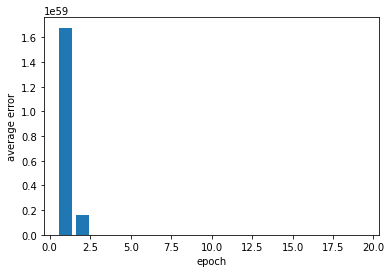

In [5]:
model = FCNN([1, 3, 1])
model.train(X_train, y_train)

<ipython-input-3-b327a5f115c6>:13: RuntimeWarning: overflow encountered in exp
  logistic_fn = lambda x: 1 / (1 + np.exp(-x))


neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.03010158e+00]])]
neuron output for this example:  -32768.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.03010158e+00]])]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.52401436e+20],
       [ 1.03010158e+00]])]
neuron output for this example:  0.0
[array([[-2.16150044e+33,  7.56257109e+37, -9.13333504e+08],
       [-3.65032820e+33,  1.27716219e+38,  7.42775458e+08]]), array([[-1.52401436e+20],
       [ 1.

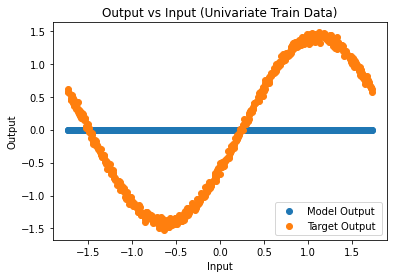

In [6]:
plt.scatter(X_train.values.tolist(),np.array([model.predict(x) for x in np.array(X_train)]))
plt.scatter(X_train.values.tolist(),y_train.values.tolist())
plt.legend(["Model Output","Target Output "], loc ="lower right")
plt.title("Output vs Input (Univariate Train Data)")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

In [7]:
def func(y): return min(y, 5000)
x = np.array([1,20000000,3])
x = func(x)
x

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# Define a function to apply to the array
def my_function(x):
    return np.sin(x)

# Create a NumPy array
x = np.array([0, np.pi/2, np.pi])

# Apply the function to the array in-place
np.vectorize(my_function, otypes=[np.float])(x, out=x)

print(x)

<ipython-input-72-9bf4b4a8fb05>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.vectorize(my_function, otypes=[np.float])(x, out=x)


TypeError: my_function() got an unexpected keyword argument 'out'